In [9]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

# Prepare

In [10]:
# Data
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Model

In [11]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model.n_neighbors

5

# Predict

In [12]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

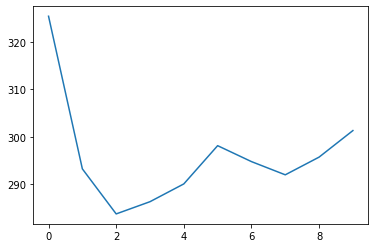

In [13]:
# Calculate RMSE for k on train
RMSE = []
RMSE_CV = []
for k in range(10):
    k=k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rsme = np.sqrt(mean_squared_error(y_train, y_pred))
    rsme_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring="neg_mean_squared_error").mean())

    RMSE.append(rsme)
    RMSE_CV.append(rsme_cv)

# Plot
plt.plot(RMSE_CV);
# plt.plot(RMSE);

# Model Tuning

In [14]:
knn_params ={'n_neighbors': np.arange(1,30)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [15]:
knn_cv_model.best_params_["n_neighbors"]

8

In [16]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [17]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

413.7094731463598